In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


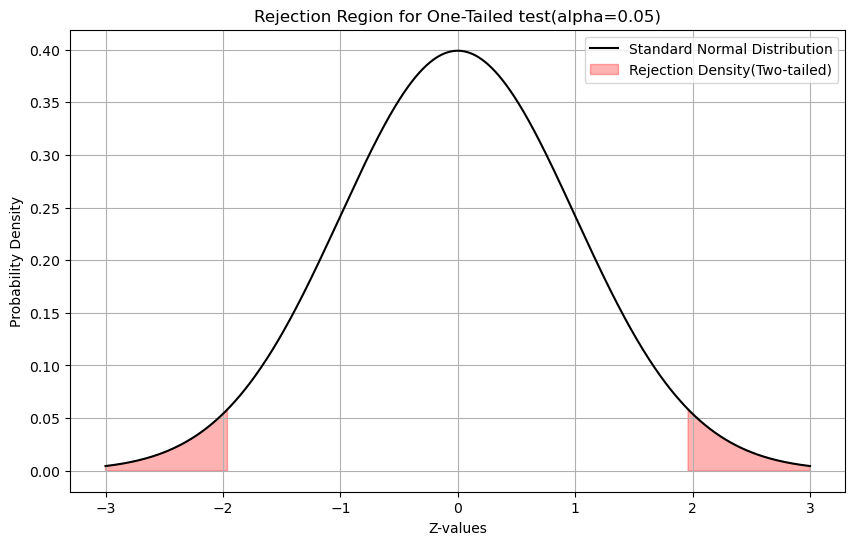

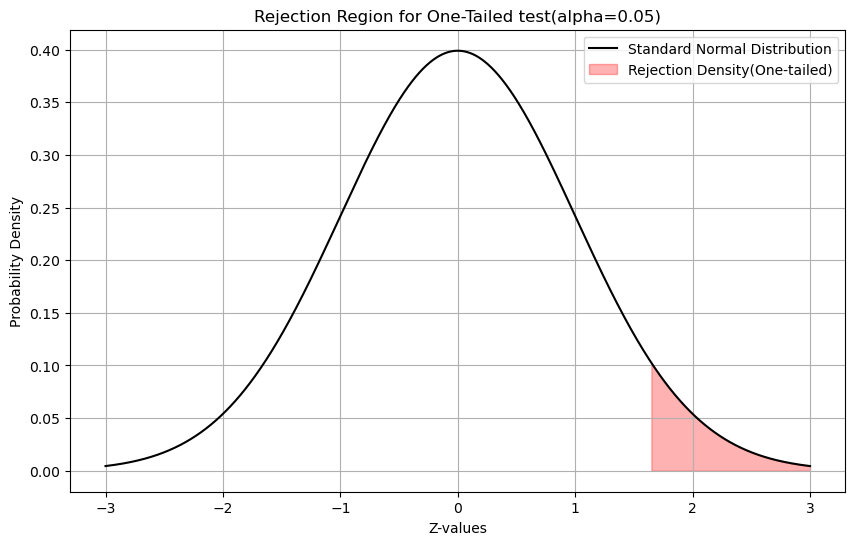

In [4]:
alpha = 0.05
critical_value_two_tailed = stats.norm.ppf(1-alpha/2)
critical_value_one_tailed = stats.norm.ppf(1-alpha)
# Generate x -va;lues for the standard normal distribution
x_values=np.linspace(-3,3,1000)
#Generates y-values (probability density) for the standard normal distribution
y_values= stats.norm.pdf(x_values)
#Plot rejection region for two tail test
plt.figure(figsize=(10,6))
plt.plot(x_values,y_values,color = 'black',label='Standard Normal Distribution' )
plt.fill_between(x_values,0,y_values,where=(x_values<= -critical_value_two_tailed)| (x_values>=critical_value_two_tailed),color='red',alpha=0.3,label='Rejection Density(Two-tailed)')
plt.xlabel('Z-values')
plt.ylabel('Probability Density')
plt.title('Rejection Region for One-Tailed test(alpha=0.05)')
plt.legend()
plt.grid(True)
plt.show()

#Plot rejection region for one tail test
plt.figure(figsize=(10,6))
plt.plot(x_values,y_values,color = 'black',label='Standard Normal Distribution' )
plt.fill_between(x_values,0,y_values,where=x_values>=critical_value_one_tailed,color='red',alpha=0.3,label='Rejection Density(One-tailed)')
plt.xlabel('Z-values')
plt.ylabel('Probability Density')
plt.title('Rejection Region for One-Tailed test(alpha=0.05)')
plt.legend()
plt.grid(True)
plt.show()












In [3]:
import pandas as pd
df= pd.read_csv("C:/Users/dbda/PycharmProjects/statistics/Dataset/tips.csv")

df.head()
tips= df['tip']

Fail to reject the null hypothesis for the right-one-tailed  test.


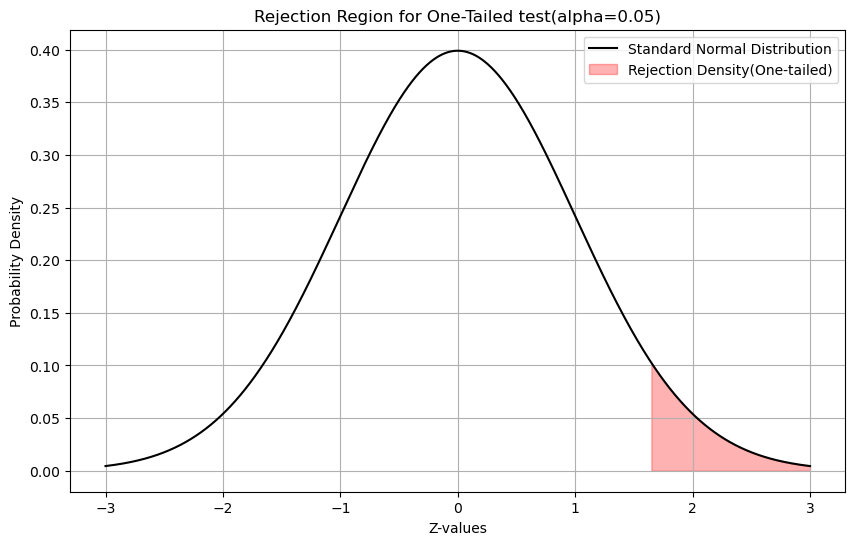

Reject the null hypothesis for the left-one-tailed test.


In [4]:
# Hypothesized mean: H0 = Population average tip value is $2.75
mu_0 = 2.98 #Uncomment to test with this value later

# Calculate sample statistics
sample_mean = tips.mean()
sample_std = tips.std()
n = len(tips)

# Compute the standard error
standard_error = sample_std / np.sqrt(n)

#Compute the z-score
z_stat = (sample_mean - mu_0) / standard_error

# Determine critical z-values for alpha
alpha = 0.05
#critical_z_two_tailed = norm.ppf(1 - alpha / 2)   # Critical z for-tailed test
critical_value_one_tailed = stats.norm.ppf(1-alpha)
x_values=np.linspace(-3,3,1000)
#Generates y-values (probability density) for the standard normal distribution
y_values= stats.norm.pdf(x_values)
if abs(z_stat) > critical_value_one_tailed:
  print("Reject the null hypothesis for the right-one-tailed test.")
else:
  print("Fail to reject the null hypothesis for the right-one-tailed  test.")

#Plot rejection region for one tail test
plt.figure(figsize=(10,6))
plt.plot(x_values,y_values,color = 'black',label='Standard Normal Distribution' )
plt.fill_between(x_values,0,y_values,where=x_values>=critical_value_one_tailed,color='red',alpha=0.3,label='Rejection Density(One-tailed)')
plt.xlabel('Z-values')
plt.ylabel('Probability Density')
plt.title('Rejection Region for One-Tailed test(alpha=0.05)')
plt.legend()
plt.grid(True)
plt.show()

#Generates y-values (probability density) for the standard normal distribution
y_values= stats.norm.pdf(x_values)
if abs(z_stat) < critical_value_one_tailed:
  print("Reject the null hypothesis for the left-one-tailed test.")
else:
  print("Fail to reject the null hypothesis for the left-one-tailed  test.")





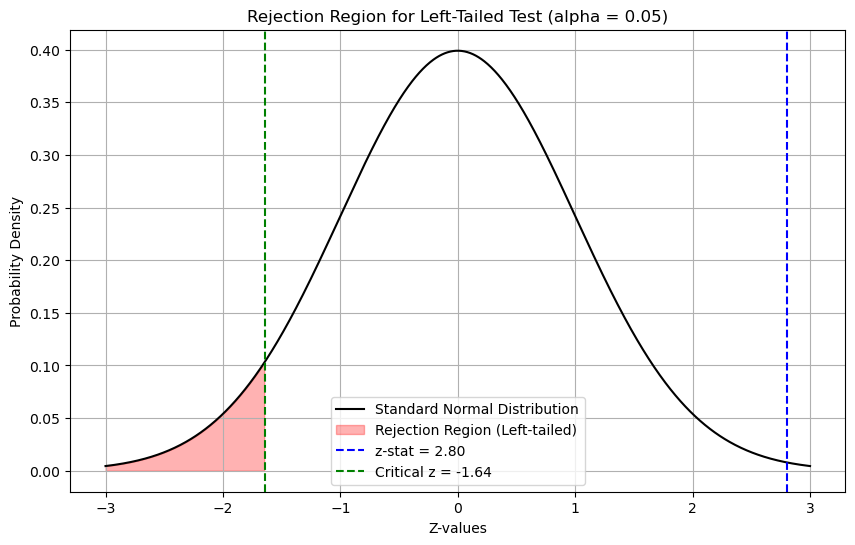

Fail to reject the null hypothesis: There is not enough evidence to conclude the population mean is less than $2.75.


In [5]:

# Hypothesized mean: H0 = Population average tip value is $2.75
mu_0 = 2.75

# Calculate sample statistics
sample_mean = tips.mean()
sample_std = tips.std()
n = len(tips)

# Compute the standard error
standard_error = sample_std / np.sqrt(n)

# Compute the z-score
z_stat = (sample_mean - mu_0) / standard_error

# Determine critical z-value for alpha (left-tailed test)
alpha = 0.05
critical_value_one_tailed = stats.norm.ppf(alpha)

# Plotting
x_values = np.linspace(-3, 3, 1000)
y_values = stats.norm.pdf(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, color='black', label='Standard Normal Distribution')
plt.fill_between(x_values, 0, y_values, where=x_values <= critical_value_one_tailed,
                 color='red', alpha=0.3, label='Rejection Region (Left-tailed)')
plt.axvline(z_stat, color='blue', linestyle='--', label=f'z-stat = {z_stat:.2f}')
plt.axvline(critical_value_one_tailed, color='green', linestyle='--', label=f'Critical z = {critical_value_one_tailed:.2f}')
plt.xlabel('Z-values')
plt.ylabel('Probability Density')
plt.title('Rejection Region for Left-Tailed Test (alpha = 0.05)')
plt.legend()
plt.grid(True)
plt.show()

# Decision
if z_stat <= critical_value_one_tailed:
    print("Reject the null hypothesis: There is enough evidence to conclude the population mean is less than $2.75.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude the population mean is less than $2.75.")





In [35]:
import pandas as pd
import numpy as np
from scipy import stats

In [6]:
# Read marathon dataset, combine them, extract only age column
df1 = pd.read_csv("C:/Users/dbda/PycharmProjects/statistics/Dataset/marathon_results_2015.csv")
df2 = pd.read_csv("C:/Users/dbda/PycharmProjects/statistics/Dataset/marathon_results_2016.csv")
df3 = pd.read_csv("C:/Users/dbda/PycharmProjects/statistics/Dataset/marathon_results_2017.csv")

combined_data = pd.concat([df1, df2, df3])
combined_data.head()

Unnamed: 0 Bib                   Name  Age M/F         City State Country  \
0         0.0   3         Desisa, Lelisa   25   M         Ambo   NaN     ETH   
1         1.0   4  Tsegay, Yemane Adhane   30   M  Addis Ababa   NaN     ETH   
2         2.0   8         Chebet, Wilson   29   M     Marakwet   NaN     KEN   
3         3.0  11       Kipyego, Bernard   28   M      Eldoret   NaN     KEN   
4         4.0  10          Korir, Wesley   32   M       Kitale   NaN     KEN   

  Citizen Unnamed: 9  ...      30K      35K      40K     Pace Proj Time  \
0     NaN        NaN  ...  1:32:00  1:47:59  2:02:39  0:04:56         -   
1     NaN        NaN  ...  1:31:59  1:47:59  2:02:42  0:04:58         -   
2     NaN        NaN  ...  1:32:00  1:47:59  2:03:01  0:04:59         -   
3     NaN        NaN  ...  1:32:00  1:48:03  2:03:47  0:05:00         -   
4     NaN        NaN  ...  1:32:00  1:47:59  2:03:27  0:05:00         -   

  Official Time Overall Gender Division Unnamed: 8  
0       2:09:17       1      1        1        NaN  
1       2:09:48       2      2        2        NaN  
2       2:10:22       3      3        3        NaN  
3       2:10:47       4      4        4        NaN  
4       2:10:49       5      5        5        NaN  

[5 rows x 26 columns]

In [7]:
age = combined_data['Age']
avg = age.mean()
pop_avg_age = 25
t_statistics, p_value = stats.ttest_1samp(age, popmean=pop_avg_age)
degree_of_freedom = len(age)-1
print("T-Statistics",t_statistics)
print("P-Value",p_value)
print("Degree of Freedom",degree_of_freedom)

# INTERPRETATION
alpha = 0.025
if p_value < alpha:
  print("The null hypothesis ( mean age = 25) is rejected.")
else:
  print("The null hypothesis (mean age = 25) cannot be rejected")

critical_value = stats.t.ppf(1-alpha,degree_of_freedom)
print("Critical Value",critical_value)

# Two-tail t-Test(Because we are just checking if sample mean = population mean)
# So, we need to take absolute value of t-statistic
if abs(t_statistics) < critical_value:
  print("The null hypothesis ( mean age = 40) cannot be rejected.")
else:
  print("The null hypothesis ( mean age = 40) is rejected.")

T-Statistics 432.7960734958792
P-Value 0.0
Degree of Freedom 79637
The null hypothesis ( mean age = 25) is rejected.
Critical Value 1.9599937735410553
The null hypothesis ( mean age = 40) is rejected.
